In [1]:
import utils
import hrr_utils
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
irregular = open('data/cleaned/irregular_verbs_clean.csv').read().strip().split()
print irregular

['alight,alighted,1', 'arise,arose,1', 'awake,awoke,5', 'be,was,10', 'bear,bore,1', 'beat,beat,1', 'become,became,5', 'beget,begot,1', 'begin,began,5', 'bend,bent,3', 'bereave,bereaved,1', 'beseech,besought,1', 'bet,bet,5', 'bid,bade,3', 'bide,bade,1', 'bind,bound,3', 'bite,bit,3', 'bleed,bled,3', 'bless,blessed,3', 'blow,blew,5', 'break,broke,5', 'breed,bred,3', 'bring,brought,7', 'broadcast,broadcast,3', 'build,built,5', 'burn,burnt,3', 'burst,burst,3', 'bust,bust,3', 'buy,bought,5', 'can,could,8', 'cast,cast,3', 'catch,caught,3', 'choose,chose,5', 'cleave,cleft,1', 'cling,clung,2', 'clothe,clothed,1', 'come,came,5', 'cost,cost,5', 'creep,crept,3', 'crow,crowed,5', 'cut,cut,5', 'deal,dealt,5', 'dig,dug,5', 'do,did,9', 'draw,drew,5', 'dream,dreamt,3', 'drink,drank,5', 'drive,drove,5', 'dwell,dwelt,3', 'eat,ate,7', 'fall,fell,6', 'feed,fed,5', 'feel,felt,5', 'fight,fought,6', 'find,found,5', 'flee,fled,3', 'fling,flung,2', 'forbid,forbad,1', 'forecast,forecast,3', 'forget,forgot,4', 'f

In [4]:
f1 = open('past-ed10000.txt').read().strip().split(" ")
f2 = open('present-ed10000.txt').read().strip().split(" ")
w = open("regular_verbs_clean.csv", 'w')

set1 = set()
set2 = set()

def check_in_set(string, sett):
    for i in range(len(string)-2):
        s = string[i:i+3]
        if s in sett:
            return True
    return False

def add_to_set(string, sett):
    for i in range(len(string)-2):
        s = string[i:i+3]
        sett.add(s)
        if s in sett:
            return True
    return False
        

for i in range(len(f1)):
    present = f2[i]
    past = f1[i]
    
    if not check_in_set(present, set1) and not check_in_set(past, set2):
        add_to_set(present, set1)
        add_to_set(past, set2)
        w.write(present+","+past+"\n")
        continue
    

IOError: [Errno 2] No such file or directory: 'past-ed10000.txt'

In [4]:
words = utils.LoadLatentSpace()
N = 20000

In [5]:
print words

['jump', 'thump', 'clump', 'break', 'streak', 'peak', 'creak', 'some', 'become', 'google', 'toggle', 'boggle', 'was', 'were', 'been']


In [6]:
dic = hrr_utils.GenerateDefaultDictionary(n=N)

In [7]:
n = np.zeros((len(words), N))

for i in np.arange(len(words)):
    n[i, :] = hrr_utils.GetRVClip(words[i], dic, 3, fn=hrr_utils.GetAllRVGrams)

In [8]:
u, s, v = np.linalg.svd(n, full_matrices=False)

In [9]:
data = v[:2, :].dot(n.T)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


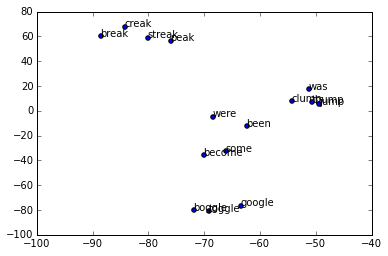

In [10]:
fig, ax = plt.subplots()
ax.scatter(data[0], data[1])

for i, txt in enumerate(words):
    ax.annotate(txt, (data[0, i],data[1, i]))

In [17]:
dic1 = hrr_utils.GenerateDefaultDictionary(n=N)
dic2 = dic1# hrr_utils.GenerateDefaultDictionary(n=N)
word_groupings = utils.LoadLatentSpaceGroups()

In [18]:
k1 = []
k2 = []
colors = []

available_colors = ['green', 'red', 'blue', 'yellow', 'black']

for i in range(len(word_groupings)):
    for pair in word_groupings[i]:
        colors.append(available_colors[i])
        wpresent = pair[0]
        wpast = pair[1]

        past_enc = hrr_utils.GetRVClip(wpast, dic1, 3, fn=hrr_utils.GetAllRVGrams)
        present_enc = hrr_utils.GetRVClip(wpresent, dic2, 3, fn=hrr_utils.GetAllRVGrams)

        diff = past_enc - present_enc
        k1.append(diff)
        k2.append(wpresent)

In [19]:
k = np.array(k1)

In [20]:
u, s, v = np.linalg.svd(k, full_matrices=False)

In [24]:
data = v[:3, ].dot(k.T)

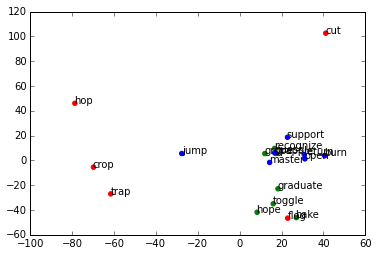

In [28]:
axis1 = 1
axis2 = 2

#2d
fig, ax = plt.subplots()
ax.scatter(data[axis1], data[axis2], color=colors)

for i, txt in enumerate(k2):
    ax.annotate(txt, (data[axis1, i],data[axis2, i]))
    
data = v[:3, ].dot(k.T)

#3d
fig = plt.figure(figsize=(15,15))
ax = mpl_toolkits.mplot3d.Axes3D(fig)

ax.scatter(data[0], data[1], data[2], color=colors)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
    
plt.show()